# SON: Zhu-Tokita-Takenouchi-Kim (ZTTK) Syndrome (OMIM #617140)

[Zhu-Tokita-Takenouchi-Kim Syndrome (OMIM #617140)](https://omim.org/entry/617140) is a rare developmental disorder caused by pathogenic variants in the *SON* gene. This syndrome, also known as **ZTTK Syndrome**, is characterized by a range of symptoms including intellectual disability, developmental delays, and craniofacial abnormalities. The disease is associated mainly with protein-truncating variants of the *SON* gene, and it is inherited in an autosomal dominant manner.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


### SON
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SON.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SON'
mane_tx_id = 'NM_138927.4'
mane_protein_id = 'NP_620305.2'
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.24') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize() 

Individuals Processed: 100%|██████████| 52/52 [00:02<00:00, 21.17 individuals/s] 
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
31,Hypotonia
30,Feeding difficulties
27,Delayed speech and language development
26,Short stature
24,Ventriculomegaly
24,Downslanted palpebral fissures
24,Seizure
22,Low-set ears
22,"Intellectual disability, severe"
21,Strabismus


In [14]:
from gpsea.model import ProteinMetadata
import pandas as pd
df = pd.DataFrame([{"region":"1-1", "category": "Repeat", "start": 1006, "end": 1011},
{"region":"1-2", "category": "Repeat", "start": 1014, "end": 1019},
{"region":"1-3", "category": "Repeat", "start": 1021, "end": 1026},
{"category": "Repeat", "start":1030,"end":1035,"region":"1-4"},
{"category": "Repeat", "start":1038,"end":1043,"region":"1-5"},
{"category": "Repeat", "start":1046,"end":1051,"region":"1-6"},
{"category": "Repeat", "start":1055,"end":1060,"region":"1-7"},
{"category": "Repeat", "start":1063,"end":1068,"region":"1-8"},
{"category": "Repeat", "start":1071,"end":1076,"region":"1-9"},
{"category": "Repeat", "start":1080,"end":1085,"region":"1-10"},
{"category": "Repeat", "start":1089,"end":1094,"region":"1-11"},
{"category": "Repeat", "start":1100,"end":1105,"region":"1-12"},
{"category": "Repeat", "start":1111,"end":1116,"region":"1-13"},
{"category": "Repeat", "start":1121,"end":1126,"region":"1-14"},
{"category": "Repeat", "start":1925,"end":1931,"region":"2-1"},
{"category": "Repeat", "start":1934,"end":1952,"region":"3-1"},
{"category": "Repeat", "start":1953,"end":1959,"region":"2-2"},
{"category": "Repeat", "start":1960,"end":1966,"region":"2-3"},
{"category": "Repeat", "start":1967,"end":1973,"region":"2-4"},
{"category": "Repeat", "start":1974,"end":1980,"region":"2-5"},
{"category": "Repeat", "start":1981,"end":1987,"region":"2-6"},
{"category": "Repeat", "start":1988,"end":1994,"region":"2-7"},
{"category": "Repeat", "start":1995,"end":2013,"region":"3-2"},
{"category":"Domain","start":2305,"end":2351,"region":"G-patch"},
{"category":"Domain","start":2371,"end":2426,"region":"DRBM"},
{"category":"Region","start":24,"end":56,"region":"Disordered"},
{"category":"Region","start":77,"end":155,"region":"Disordered"},
{"category":"Region","start":305,"end":328,"region":"Disordered"},
{"category":"Region","start":406,"end":442,"region":"Disordered"},
{"category":"Region","start":726,"end":895,"region":"17 X 10 AA tandem repeats of L-A-[ST]-[NSG]-[TS]-MDSQM"},
{"category":"Region","start":912,"end":988,"region":"11 X 7 AA tandem repeats of [DR]-P-Y-R-[LI][AG][QHP]"},
{"category":"Region","start":1006,"end":1126,"region":"14 X 6 AA repeats of [ED]-R-S-M-M-S"},
{"category":"Region","start":1144,"end":1236,"region":"Disordered",
"evidences":[{"evidenceCode":"ECO:0000256","source":"SAM"},
{"category":"Region","start":1147,"end":1179,"region":"3 X 11 AA tandem repats of P-P-L-P-P-E-E-P-P-[TME]-[MTG]"},
{"category":"Region","start":1359,"end":1390,"region":"4 X 8 AA tandem repeats of V-L-E-SS-[AVT]-VT"},
{"category":"Region","start":1645,"end":1722,"region":"Disordered"},
{"category":"Region","start":1754,"end":2054,"region":"Disordered"},
{"category":"Region","start":1925,"end":1994,"region":"7 X 7 AA repeats of P-S-R-R-S-R-[TS]"},
{"category":"Region","start":1934,"end":2013,"region":"2 X 19 AA repeats of P-S-R-R-R-R-S-R-S-V-V-R-R-R-S-F-S-I-S"},
{"category":"Region","start":2013,"end":2039,"region":"3 X tandem repeats of [ST]-P-[VLI]-R-[RL]-[RK]-[RF]-S-R"},
{"category":"Region","start":2200,"end":2220,"region":"Disordered"},
{"category":"Compositional bias","start":24,"end":45,"region":"Polar residues"},
{"category":"Compositional bias","start":77,"end":91,"region":"Basic and acidic residues"},
{"category":"Compositional bias","start":107,"end":127,"region":"Basic residues"},
{"category":"Compositional bias","start":128,"end":155,"region":"Basic and acidic residues"},
{"category":"Compositional bias","start":1147,"end":1180,"region":"Pro residues"}]},
{"category":"Compositional bias","start":1186,"end":1236,"region":"Polar residues"},
{"category":"Compositional bias","start":1780,"end":1827,"region":"Basic and acidic residues"},
{"category":"Compositional bias","start":1841,"end":1914,"region":"Basic residues"},
{"category":"Compositional bias","start":1921,"end":1945,"region":"Basic residues"},
{"category":"Compositional bias","start":1958,"end":2006,"region":"Basic residues"},
{"category":"Compositional bias","start":2019,"end":2043,"region":"Basic residues"}
])
protein_meta = ProteinMetadata.from_feature_frame(protein_id=mane_protein_id, label="SON", features=df, protein_length=2426)

ValueError: zero-size array to reduction operation maximum which has no identity

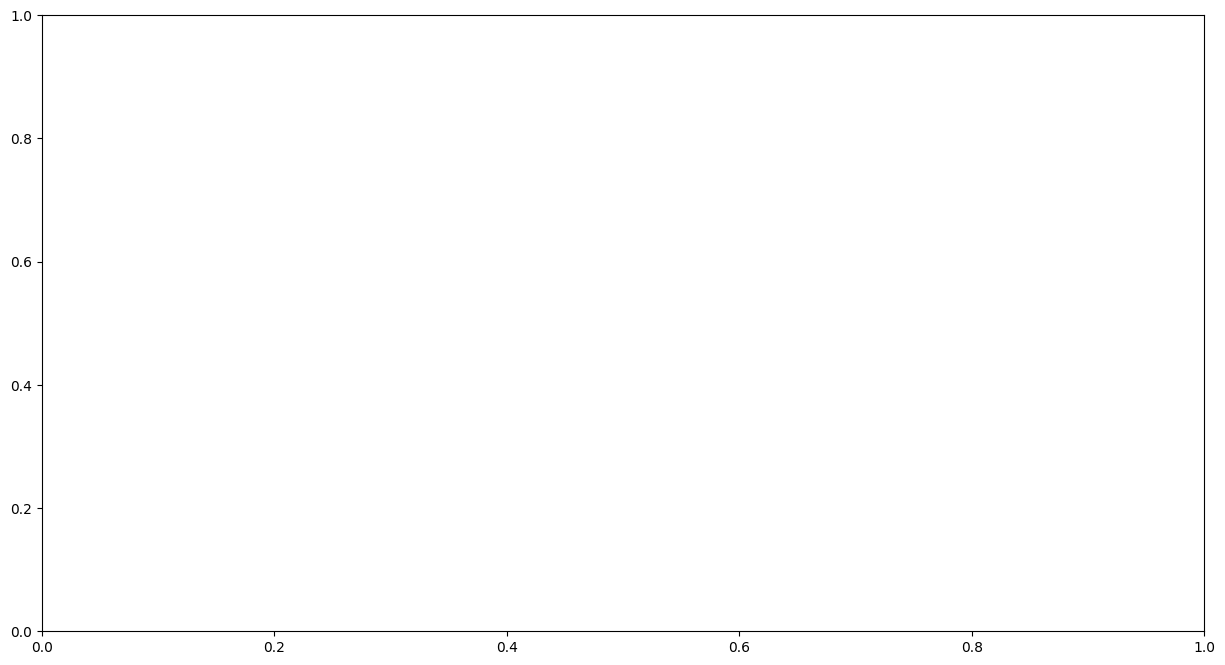

In [16]:
from gpsea.model.genome import GRCh38
from gpsea.model import ProteinMetadata
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
protein_meta = pms.ppr
tx_coordinates = txc_service.fetch(mane_tx_id)
son_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
     cohort,
    protein_meta,
    ax=ax,
)
son_fig.tight_layout()

In [5]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
0,Disordered,Region,25 - 56,
0,Polar residues,Compositional bias,25 - 45,
0,Disordered,Region,78 - 155,
0,Basic and acidic residues,Compositional bias,78 - 91,
0,Basic residues,Compositional bias,108 - 127,
0,Basic and acidic residues,Compositional bias,129 - 155,
0,Disordered,Region,306 - 328,
0,Disordered,Region,407 - 442,
0,17 X 10 AA tandem repeats of L-A-[ST]-[NSG]-[TS]-MDSQM,Region,727 - 895,
0,11 X 7 AA tandem repeats of [DR]-P-Y-R-[LI][AG][QHP],Region,913 - 988,


In [6]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
13,21_33554981_33554985_CAGTT_C,c.5753_5756del (p.Val1918GlufsTer87),3,frameshift
2,21_33551111_33551113_CAG_C,c.1881_1882del (p.Val629AlafsTer56),3,frameshift
2,21_33552565_33552565_C_T,c.3334C>T (p.Arg1112Ter),3,stop gained
2,SO:1000029_HGNC:11183_SON,SV involving SON (p.?),,chromosomal deletion
2,21_33553078_33553083_TGTATG_T,c.3852_3856del (p.Met1284IlefsTer2),3,frameshift
2,21_33555240_33555241_TG_T,c.6010del (p.Val2004TrpfsTer2),3,frameshift
1,21_33549687_33549688_TG_T,c.457del (p.Asp153IlefsTer4),3,frameshift
1,21_33550674_33550675_GC_G,c.1444del (p.Leu482CysfsTer4),3,frameshift
1,21_33555317_33555318_GC_G,c.6087del (p.Ser2029ArgfsTer22),3,frameshift
1,21_33549625_33549625_C_T,c.394C>T (p.Gln132Ter),3,stop gained


## Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest
from gpsea.analysis.pcats import configure_hpo_term_analysis

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_key
from gpsea.view import MtcStatsViewer

c5753_5756del = variant_key('21_33554981_33554985_CAGTT_C') # c.5753_5756del	p.Val1918GlufsTer87
c5753_5756del_clf = monoallelic_classifier(
    a_predicate=c5753_5756del,
    b_predicate=~c5753_5756del,
    a_label="c.5753_5756del",
    b_label="Other"
)
c5753_5756del_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=c5753_5756del_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(c5753_5756del_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,25
HMF03,Skipping term because of a child term with the same individual counts,11
HMF08,Skipping general term,52
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,52


In [9]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, c5753_5756del_result)

Allele group,c.5753_5756del,Other,Corrected p values,p values
Strabismus [HP:0000486],2/11 (18%),19/36 (53%),1.0,0.080929
Ventriculomegaly [HP:0002119],4/11 (36%),20/33 (61%),1.0,0.185126
Low-set ears [HP:0000369],5/12 (42%),17/31 (55%),1.0,0.509788
Seizure [HP:0001250],5/13 (38%),19/38 (50%),1.0,0.533920
Hypotonia [HP:0001252],7/13 (54%),24/38 (63%),1.0,0.743193
Intellectual disability [HP:0001249],12/12 (100%),37/38 (97%),1.0,1.000000
Neurodevelopmental abnormality [HP:0012759],13/13 (100%),38/38 (100%),1.0,1.000000
Abnormal conjugate eye movement [HP:0000549],2/2 (100%),19/19 (100%),1.0,1.000000
Abnormal cerebral morphology [HP:0002060],3/3 (100%),19/19 (100%),1.0,1.000000
Abnormal cerebral ventricle morphology [HP:0002118],4/4 (100%),20/20 (100%),1.0,1.000000


In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf = monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="missense",
    b_label="Other"
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, missense_result)

Allele group,missense,Other,Corrected p values,p values
Intellectual disability [HP:0001249],1/2 (50%),48/48 (100%),0.695652,0.040000
Ventriculomegaly [HP:0002119],0/3 (0%),24/41 (59%),0.695652,0.086077
"Intellectual disability, severe [HP:0010864]",1/2 (50%),21/21 (100%),0.695652,0.086957
Epicanthus [HP:0000286],2/3 (67%),9/44 (20%),0.793710,0.132285
Seizure [HP:0001250],0/3 (0%),24/48 (50%),0.969473,0.237647
Strabismus [HP:0000486],0/3 (0%),21/44 (48%),0.969473,0.242368
Feeding difficulties [HP:0011968],1/3 (33%),29/45 (64%),1.000000,0.547294
Low-set ears [HP:0000369],1/3 (33%),21/40 (52%),1.000000,0.606920
Downslanted palpebral fissures [HP:0000494],1/3 (33%),23/44 (52%),1.000000,0.608511
Slanting of the palpebral fissure [HP:0200006],1/1 (100%),23/23 (100%),1.000000,1.000000


In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Ventriculomegaly [HP:0002119],8/20 (40%),16/24 (67%),1.0,0.128152
Generalized joint hypermobility [HP:0002761],6/25 (24%),11/26 (42%),1.0,0.236706
Low-set ears [HP:0000369],9/21 (43%),13/22 (59%),1.0,0.366030
Feeding difficulties [HP:0011968],17/24 (71%),13/24 (54%),1.0,0.371469
Hypotonia [HP:0001252],17/25 (68%),14/26 (54%),1.0,0.392862
"Intellectual disability, severe [HP:0010864]",12/12 (100%),10/11 (91%),1.0,0.478261
Strabismus [HP:0000486],11/22 (50%),10/25 (40%),1.0,0.564277
Seizure [HP:0001250],11/25 (44%),13/26 (50%),1.0,0.781251
Abnormal conjugate eye movement [HP:0000549],11/11 (100%),10/10 (100%),1.0,1.000000
Slanting of the palpebral fissure [HP:0200006],11/11 (100%),13/13 (100%),1.0,1.000000


# Summary

In [14]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=c5753_5756del_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = """Dingemans et al (2020) suggested a different pathomechanism for missense variants, but only our cohort only contains 3 individuals
 with missense variants, so there is no statistical power \\cite{PMID_34521999}."""

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [15]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
missense,Other,24,0
Genotype (A),Genotype (B),Tests performed,Significant tests
c.5753_5756del,Other,26,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,27,0


In [ ]:
summarizer.process_latex(report=report, protein_fig=son_fig)